In [23]:
import pandas as pd
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import sklearn.cluster
import sklearn.preprocessing
import nltk

In [2]:
# read in the csv data
mathematicians = pd.read_csv('data/math_data.csv', delimiter=',')

# take only those rows with a numeric mathId (the scraping went bad at some points)
mathematicians = mathematicians[mathematicians.mathId.apply(lambda x: x.isnumeric())].set_index('mathId')

In [65]:
# add a row for numeric year
years = mathematicians.thesisYear.apply(pd.to_numeric, errors='coerce')
# some of the years were doubled up, eg 19771984. Fix in those cases:
for idx in years[years > 10000].index:
    years[idx] = float(int(years[idx]/10000))
# add a column to the dataframe with numeric years
mathematicians['numericYear'] = years
# filter out some obvious bad ones, this might be throwing out a bunch of my data...
mathematicians = mathematicians[(mathematicians.numericYear.isnull() == False)
                               & (mathematicians.numericYear > 1000)
                               & (mathematicians.thesis.notnull()) 
                                & (mathematicians.thesisUniversity.notnull())
                               & (mathematicians.thesisCountry.notnull())]

# Counting most common universities and countries

In [67]:
encoder = sklearn.preprocessing.LabelEncoder()

In [68]:
encoder.fit_transform(mathematicians.thesisUniversity)

array([ 750,  750,  750, ...,  571, 1498, 1375])

In [69]:
encoder.classes_

array(['(Candidate of Sciences) Novosibirsk State University',
       '(Candidate of Sciences) Sobolev Institute of Mathematics Novosibirsk',
       "(Doctorat d'Etat) Université Paris Diderot - Paris 7", ...,
       'ès sciences techniques École Polytechnique Fédérale de Lausanne',
       'ès. sc. École Polytechnique Fédérale de Lausanne',
       'İstanbul Teknik Üniversitesi'], dtype=object)

In [70]:
mcUni500 = list(mathematicians.thesisUniversity.value_counts().head(500).index)

In [79]:
x = mathematicians[mathematicians.thesisUniversity.isin(mcUni500)]

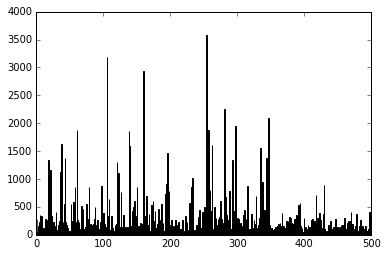

In [87]:
#plt.scatter(x.numericYear, encoder.fit_transform(x.thesisUniversity), c='blue')
_x = encoder.fit_transform(x.thesisUniversity)
plt.hist(_x, bins=500);

# Thesis title analysis

In [129]:
textblock = '\n'.join([line for line in mathematicians.thesis])
stopwords = nltk.corpus.stopwords.words('german') + \
            nltk.corpus.stopwords.words('english') + \
            [';',',','.',':','(',')','de','la']
words = [word.lower() for word in nltk.word_tokenize(textblock) if word.lower() not in stopwords]
textobj = nltk.Text(words)

In [130]:
distobj=nltk.FreqDist(words)

In [131]:
finder = nltk.collocations.BigramCollocationFinder.from_words(textobj)
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [133]:
finder.nbest(bigram_measures.pmi, 20)

[("'6", '/6'),
 ("'compound", "jets'"),
 ("'e", 'esqueleto'),
 ("'equations", "diff'erentielles"),
 ("'formalismo", 'modificado'),
 ("'geometrie", "dynamen'"),
 ("'n'-dimensionalen", 'raumen'),
 ("'p'-adic", "'g'-adic"),
 ("'potential", "analogy'"),
 ("'t", 'hout'),
 ("'une", 'molécule'),
 ("'variable'", 'l**p-boundedness'),
 ('**', 'ito-formel'),
 ('*-darstellungen', 'polynomalgebra'),
 ('*-urejenih', 'celih'),
 ('*3', '**'),
 ('*homomorphisms', 'c*w*-algebras'),
 ('*modules', '*simple'),
 ('*semi', '*simplicity'),
 ('*simple', '*rings')]